# Pedidos Ya en 2022

## Importando bibliotecas

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creacion de funciones

In [57]:
#funcion que crea el dataset inicial
def df_inicial(carpeta):
    '''
    crea el dataframe con los csv que haya en la carpeta
    Arg :
    carpeta = string que dice la direccion de la carpeta
    
    Return:
    Devuelve un dataframe
    '''
    lista_cachonda = os.listdir(carpeta)
    data = pd.read_csv('../Data/ordersPerDay_20220101-20220131-1671324733.csv')
    #print(os.listdir(filepath))
    for i in lista_cachonda:
        if i.endswith('.csv') and i.rfind('20220101-20220131') == -1:
            file = carpeta + '/' + i
            temp_data = pd.read_csv(file)
            data = pd.concat([data, temp_data])
    return data

#funcion que elimina las columnas del dataset

def eli_col(dataset, nombre_columnas):
    '''
    elimina las columnas especificadas
    Arg :
    dataset = dataset original
    nombre_columnas = nombre de las columnas a eliminar tiene que ser una lista con los nombres
    
    Return:
    Devuelve una copia del dataframe original pero sin las columnas especificadas
    '''
    df = dataset.drop(nombre_columnas, axis=1)
    return df

#funcion que transforma los registros de una columna en floats
def col_to_float(dataframe, nombre_columna):
    '''
    transforma a float los valores de la columna dada
    Arg :
    dataset = dataframe de entrada
    nombre_columna = nombre de las columna que quiero transformar a float sus elementos
    
    Return:
    Devuelve una copia del dataframe original pero sin las columnas especificadas
    '''
    l_inicial = dataframe[nombre_columna].to_list()
    l_final = []
    for el in l_inicial:
        l_final.append(float(el.replace('.', '')[:-3]))
    df_temp = eli_col(dataframe, nombre_columna)
    #print(df_temp.columns)
    df_chiquito = pd.DataFrame(l_final, columns=[nombre_columna])
    dataframe.reset_index(inplace=True, drop=True)
    n_df = pd.concat([df_temp, df_chiquito], axis=1)
    
    return n_df

## Armando el Dataset Anual

In [58]:
df_nuevo = df_inicial('../Data')

### Limpieza del Dataset

In [59]:
# elimino las columnas que no sirven y las que voy a reemplazar sus elemntos por floats
#columnas que no sirven
l = ['Pedidos con pickup', 'Ventas con pickup', 'Ventas con delivery']
df_n = eli_col(df_nuevo, l)

In [60]:
#Chequeo los duplicados
#data.duplicated()

# Elimino los duplicados
df_n.drop_duplicates(inplace=True)

In [61]:
#Separacion de la fecha
df_n['Mes'] = df_n.Fecha.str.split('-').str[1]
df_n['Año'] = df_n.Fecha.str.split('-').str[0]
df_n['Dia'] = df_n.Fecha.str.split('-').str[2]

In [70]:
#transformacion de los registros de columnas ventas a float
df_1 = col_to_float(df_n, 'Ventas con pago online')
df_2 = col_to_float(df_1, 'Ventas en efectivo')
df_final = col_to_float(df_2, 'Ventas')
df_final.head()

,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas con pago online,Ventas en efectivo,Ventas
0,2022-01-01,73,0,34,39,73,01,2022,01,46196.0,52531.0,98727.0
1,2022-01-02,122,0,64,58,122,01,2022,02,80472.0,63710.0,144182.0
2,2022-01-03,88,0,57,31,88,01,2022,03,58192.0,32502.0,90694.0
3,2022-01-04,164,0,98,66,164,01,2022,04,105615.0,67385.0,173000.0
4,2022-01-05,110,0,60,50,110,01,2022,05,76152.0,55424.0,131576.0


In [117]:
#Elimino las coolumnas que no aportan nada
data.drop(['Pedidos con pickup', 'Ventas con pickup'], axis=1, inplace=True)

In [71]:
#Chequeo
df_final.columns

Index(['Fecha', 'Pedidos', 'Rechazados', 'Pedidos con pago online',
       'Pedidos con pago en efectivo', 'Pedidos con delivery', 'Mes', 'Año',
       'Dia', 'Ventas con pago online', 'Ventas en efectivo', 'Ventas'],
      dtype='object')

### Eliminando Registros Repetidos

In [7]:
#Chequeo de la eliminacion
data.shape #(365, 12)

(365, 12)

In [72]:
# Veo como se cargaron los datos
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fecha                         365 non-null    object 
 1   Pedidos                       365 non-null    int64  
 2   Rechazados                    365 non-null    int64  
 3   Pedidos con pago online       365 non-null    int64  
 4   Pedidos con pago en efectivo  365 non-null    int64  
 5   Pedidos con delivery          365 non-null    int64  
 6   Mes                           365 non-null    object 
 7   Año                           365 non-null    object 
 8   Dia                           365 non-null    object 
 9   Ventas con pago online        365 non-null    float64
 10  Ventas en efectivo            365 non-null    float64
 11  Ventas                        365 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 34.3+ KB


## Ventas

### Ventas totales por Mes

In [73]:
df_final.groupby('Mes')['Ventas'].sum()

Mes
01     4143196.0
02     4647215.0
03     4843198.0
04     6187200.0
05     7423721.0
06     8425443.0
07     8823077.0
08    10144750.0
09     9998846.0
10    10451398.0
11    11200037.0
12    10880186.0
Name: Ventas, dtype: float64

In [74]:
#metricas rapidas
df_final.groupby('Mes')['Ventas'].describe()


,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
01,31.0,133651.483871,39225.823816,58016.0,108463.00,131576.0,161248.50,207128.0
02,28.0,165971.964286,41687.618653,66559.0,146705.25,168056.0,192447.75,234840.0
03,31.0,156232.193548,34882.250545,91548.0,140248.50,156026.0,181052.00,234632.0
04,30.0,206240.000000,43974.614766,125279.0,174031.00,199737.0,244391.00,280335.0
05,31.0,239474.870968,66089.291670,24351.0,197568.50,240879.0,285998.00,356527.0
06,30.0,280848.100000,66588.340769,150388.0,226322.25,273739.0,344272.50,390982.0
07,31.0,284615.387097,83321.713911,101546.0,230601.00,298220.0,346820.00,399334.0
08,31.0,327250.000000,73806.201586,182383.0,275644.50,341504.0,378132.00,454415.0
09,30.0,333294.866667,88984.123413,117005.0,267063.25,340599.5,399625.75,491756.0


### Evolucion de las Ventas totales a lo largo de los Meses del 2022

<AxesSubplot:title={'center':'Ventas totales del 2022'}, xlabel='Mes'>

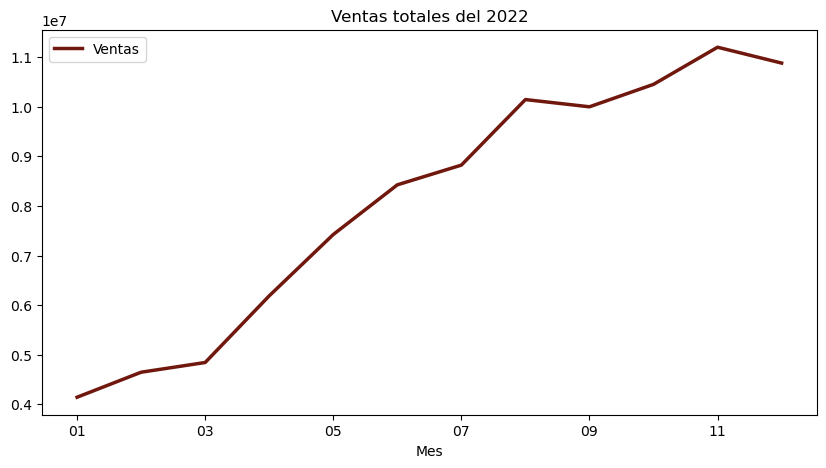

In [75]:
df_final.groupby(by='Mes')['Ventas'].sum().plot(color='#70180E', legend=True, figsize=(10, 5), title='Ventas totales del 2022', linewidth=2.5)

### Evolucion de las Ventas en Efectivo y Pago Online a lo largo de los Meses en 2022

<AxesSubplot:title={'center':'Ventas del 2022 Online vs Efectivo'}, xlabel='Mes'>

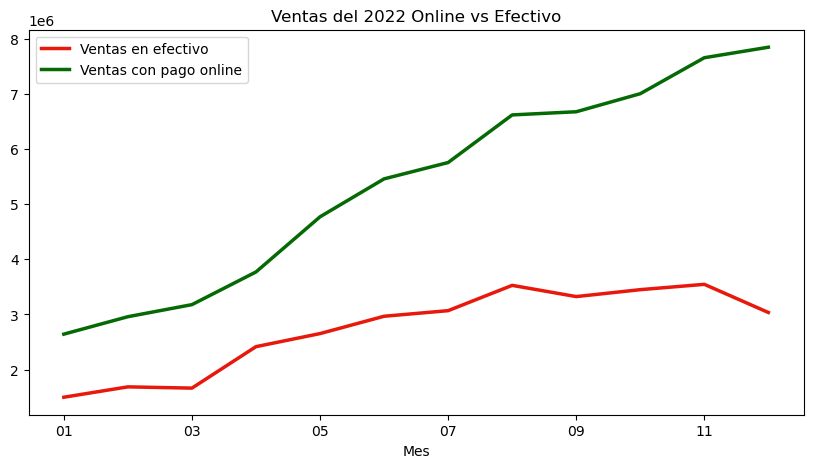

In [76]:
df_final.groupby(by='Mes')[['Ventas en efectivo', 'Ventas con pago online']].sum().plot(legend=True, figsize=(10, 5), title='Ventas del 2022 Online vs Efectivo', color=['#E8190C', '#056904'], linewidth=2.5)

### Distribucion de las 3 Ventas

Text(0.5, 1.0, 'Distribucion de las ventas totales a lo largo de los 12 Meses')

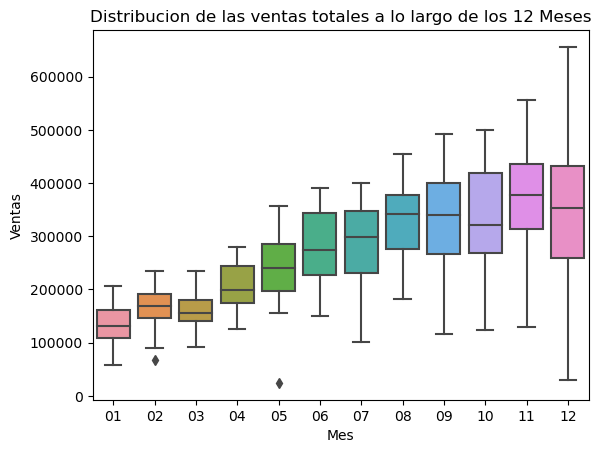

In [78]:
#Distribucion de ventas totales
sns.boxplot(data=df_final, x='Mes', y='Ventas')
plt.title('Distribucion de las ventas totales a lo largo de los 12 Meses')

Text(0.5, 1.0, 'Distribucion de las ventas Online a lo largo de los 12 Meses')

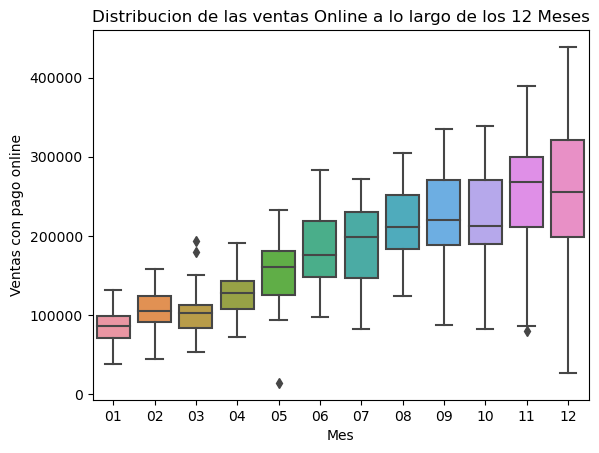

In [79]:
#Ventas Con Pago Online
sns.boxplot(data=df_final, x='Mes', y='Ventas con pago online')
plt.title('Distribucion de las ventas Online a lo largo de los 12 Meses')

Text(0.5, 1.0, 'Distribucion de las ventas en efectivo a lo largo de los 12 Meses')

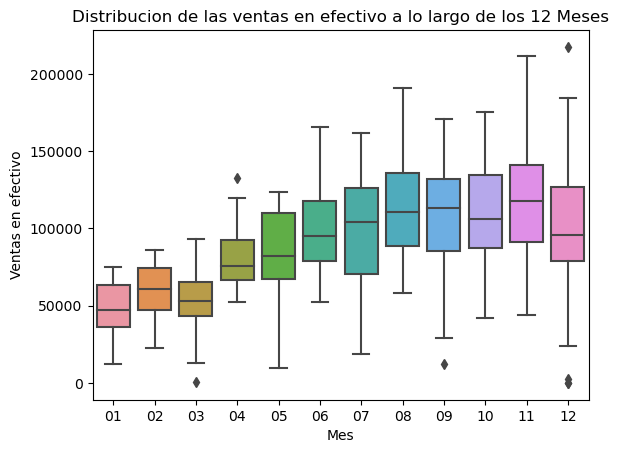

In [80]:
# Ventas en Efectivo
sns.boxplot(data=df_final, x='Mes', y='Ventas en efectivo')
plt.title('Distribucion de las ventas en efectivo a lo largo de los 12 Meses')

In [86]:
#Porcentajes Ventas
n_on = df_final['Ventas con pago online'].to_numpy()
n_to = df_final['Ventas'].to_numpy()
n_efe = df_final['Ventas en efectivo'].to_numpy()

porce_on = (n_on / n_to) * 100
porce_efe = (n_efe / n_to) * 100

Porce_on = pd.DataFrame(porce_on, columns=['Porcentaje Ventas Online'])
Porce_efe = pd.DataFrame(porce_efe, columns=['Porcentaje Ventas en Efectivo'])



df_final.reset_index(inplace=True, drop=True)

df_final = pd.concat([df_final, Porce_on], axis=1)
df_final = pd.concat([df_final, Porce_efe], axis=1)

#print(porce_efe.round(2))

In [87]:
#Chequeo
df_final.head()

,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas con pago online,Ventas en efectivo,Ventas,Porcentaje Ventas Online,Porcentaje Ventas en Efectivo
0,2022-01-01,73,0,34,39,73,01,2022,01,46196.0,52531.0,98727.0,46.791658,53.208342
1,2022-01-02,122,0,64,58,122,01,2022,02,80472.0,63710.0,144182.0,55.812792,44.187208
2,2022-01-03,88,0,57,31,88,01,2022,03,58192.0,32502.0,90694.0,64.163010,35.836990
3,2022-01-04,164,0,98,66,164,01,2022,04,105615.0,67385.0,173000.0,61.049133,38.950867
4,2022-01-05,110,0,60,50,110,01,2022,05,76152.0,55424.0,131576.0,57.876816,42.123184


### Metricas de los Porcentajes de Ventas Efectivo / Online

In [88]:
df_final.groupby(by='Mes')['Porcentaje Ventas Online', 'Porcentaje Ventas en Efectivo'].describe()

C:\Users\Gian_\AppData\Local\Temp\ipykernel_17156\1763576827.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_final.groupby(by='Mes')['Porcentaje Ventas Online', 'Porcentaje Ventas en Efectivo'].describe()


Porcentaje Ventas Online                                             \
                       count       mean       std        min        25%   
Mes                                                                       
01                      31.0  64.181018  7.346697  46.791658  61.209035   
02                      28.0  63.754763  6.000747  51.633418  59.389028   
03                      31.0  65.150891  9.341004  53.583519  60.538804   
04                      30.0  60.893493  5.126646  49.884187  57.735038   
05                      31.0  64.119511  4.437201  54.278954  61.220576   
06                      30.0  64.902219  5.933565  49.850532  62.252664   
07                      31.0  65.956525  7.080908  53.979936  61.276614   
08                      31.0  65.291240  6.428236  53.670378  59.544576   
09                      30.0  66.890823  7.758286  53.874097  61.885668   
10                      31.0  66.973825  4.914810  58.058163  62.676718   
11                      30.0  68.168629  4.446113  58.198807  66.166485   
12                      31.0  74.103334  9.143598  63.861625  68.853955   

                                      Porcentaje Ventas en Efectivo  \
           50%        75%         max                         count   
Mes                                                                   
01   63.620568  66.932011   88.706134                          31.0   
02   63.751683  67.589052   76.537705                          28.0   
03   63.356438  66.796295   99.502058                          31.0   
04   59.868799  66.130668   69.615864                          30.0   
05   64.196555  67.545389   72.802458                          31.0   
06   65.436642  68.570819   75.153558                          30.0   
07   66.747797  68.726993   87.016348                          31.0   
08   66.901117  70.477398   76.413173                          31.0   
09   66.266978  70.861210   95.218496                          30.0   
10   67.168754  70.820207   75.860990                          31.0   
11   68.814338  70.108220   77.342657                          30.0   
12   72.083060  77.407115  100.000000                          31.0   

                                                                      \
          mean       std        min        25%        50%        75%   
Mes                                                                    
01   35.818982  7.346697  11.293866  33.067989  36.379432  38.790965   
02   36.245237  6.000747  23.462295  32.410948  36.248317  40.610972   
03   34.849109  9.341004   0.497942  33.203705  36.643562  39.461196   
04   39.106507  5.126646  30.384136  33.869332  40.131201  42.264962   
05   35.880489  4.437201  27.197542  32.454611  35.803445  38.779424   
06   35.097781  5.933565  24.846442  31.429181  34.563358  37.747336   
07   34.043475  7.080908  12.983652  31.273007  33.252203  38.723386   
08   34.708760  6.428236  23.586827  29.522602  33.098883  40.455424   
09   33.109177  7.758286   4.781504  29.138790  33.733022  38.114332   
10   33.026175  4.914810  24.139010  29.179793  32.831246  37.323282   
11   31.831362  4.446096  22.657343  29.891780  31.185662  33.833515   
12   25.896666  9.143598   0.000000  22.592885  27.916940  31.146045   

                
           max  
Mes             
01   53.208342  
02   48.366582  
03   46.416481  
04   50.115813  
05   45.721046  
06   50.149468  
07   46.020064  
08   46.329622  
09   46.125903  
10   41.941837  
11   41.801193  
12   36.138375

### Graficos de los Porcentajes de Ventas en Efectivo / Online

Text(0.5, 1.0, 'Porcentaje Ventas Online')

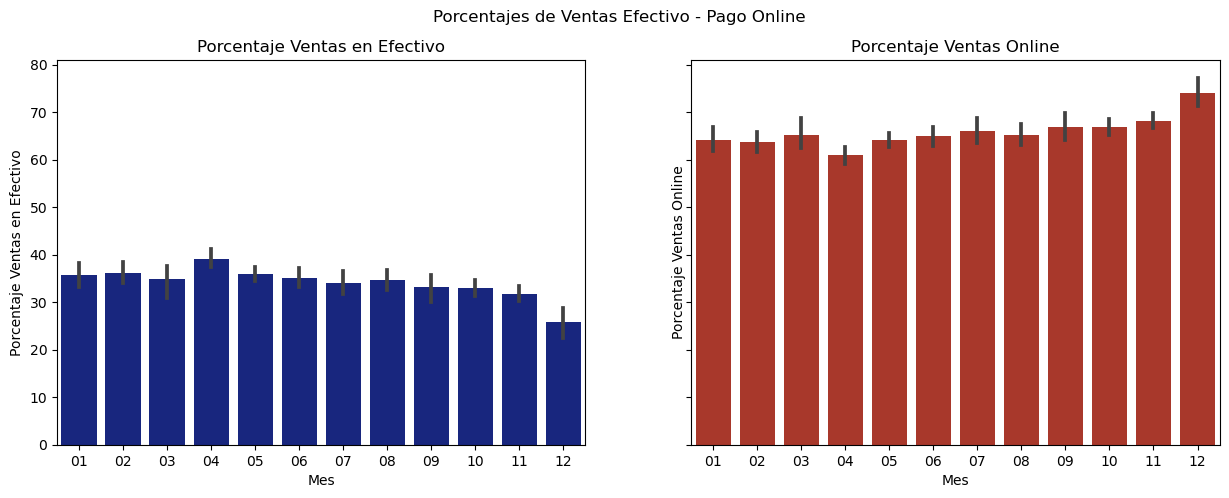

In [91]:
#Intento de ploteo
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Porcentajes de Ventas Efectivo - Pago Online')
#Efectivo
s1 = sns.barplot(x = 'Mes', y = 'Porcentaje Ventas en Efectivo', data=df_final, color = '#07198F', estimator=np.mean, ax=axes[0])
axes[0].set_title('Porcentaje Ventas en Efectivo')
#Pago Online
s1 = sns.barplot(x = 'Mes', y ='Porcentaje Ventas Online', data=df_final, color = '#BD2716', estimator=np.mean, ax=axes[1])
axes[1].set_title('Porcentaje Ventas Online')


## Pedidos

### Distribucion de Cantidad de Pedidos Totales

<AxesSubplot:xlabel='Mes', ylabel='Pedidos'>

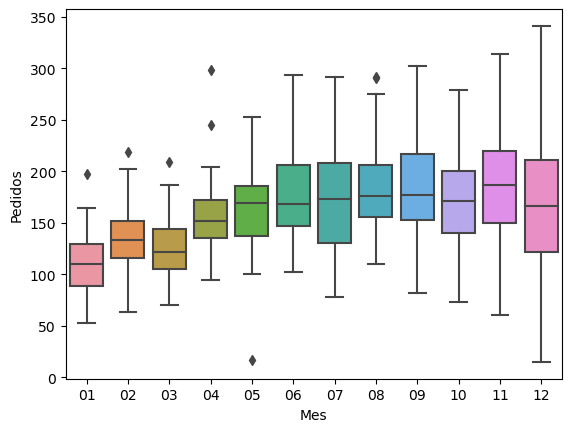

In [92]:
# Distribucion Pedidos totales
sns.boxplot(data=df_final, x='Mes', y='Pedidos')

### Metricas

In [93]:
df_final.groupby('Mes')['Pedidos'].describe()

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
01,31.0,111.677419,33.114334,53.0,88.50,110.0,129.50,197.0
02,28.0,135.035714,37.412102,63.0,116.25,133.0,152.00,219.0
03,31.0,127.064516,32.290283,70.0,105.00,122.0,143.50,209.0
04,30.0,158.833333,39.827285,94.0,135.00,152.0,171.75,298.0
05,31.0,164.870968,47.031721,17.0,137.50,169.0,186.00,253.0
06,30.0,180.500000,52.559818,102.0,146.50,168.5,206.00,293.0
07,31.0,169.322581,55.668894,78.0,130.50,173.0,208.00,291.0
08,31.0,185.387097,51.009592,110.0,156.00,176.0,206.50,291.0
09,30.0,184.233333,52.897874,82.0,152.25,177.0,217.00,302.0


In [94]:
# Porcentaje de pedidos
pe_on = df_final['Pedidos con pago online'].to_numpy()
pe_to = df_final['Pedidos con delivery'].to_numpy()
pe_efe = df_final['Pedidos con pago en efectivo'].to_numpy()

pe_porce_on = (pe_on / pe_to) * 100
pe_porce_efe = (pe_efe / pe_to) * 100

Pe_Porce_on = pd.DataFrame(pe_porce_on, columns=['Porcentaje Pedidos Online'])
Pe_Porce_efe = pd.DataFrame(pe_porce_efe, columns=['Porcentaje Pedidos en Efectivo'])



df_final.reset_index(inplace=True, drop=True)

df_final = pd.concat([df_final, Pe_Porce_on], axis=1)
df_final = pd.concat([df_final, Pe_Porce_efe], axis=1)

In [95]:
#chequeo
df_final.head()


,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas con pago online,Ventas en efectivo,Ventas,Porcentaje Ventas Online,Porcentaje Ventas en Efectivo,Porcentaje Pedidos Online,Porcentaje Pedidos en Efectivo
0,2022-01-01,73,0,34,39,73,01,2022,01,46196.0,52531.0,98727.0,46.791658,53.208342,46.575342,53.424658
1,2022-01-02,122,0,64,58,122,01,2022,02,80472.0,63710.0,144182.0,55.812792,44.187208,52.459016,47.540984
2,2022-01-03,88,0,57,31,88,01,2022,03,58192.0,32502.0,90694.0,64.163010,35.836990,64.772727,35.227273
3,2022-01-04,164,0,98,66,164,01,2022,04,105615.0,67385.0,173000.0,61.049133,38.950867,59.756098,40.243902
4,2022-01-05,110,0,60,50,110,01,2022,05,76152.0,55424.0,131576.0,57.876816,42.123184,54.545455,45.454545


### Metricas de los Porcentajes de Pedidos

In [96]:
df_final.groupby(by='Mes')['Porcentaje Pedidos Online', 'Porcentaje Pedidos en Efectivo'].describe()

C:\Users\Gian_\AppData\Local\Temp\ipykernel_17156\4244033343.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_final.groupby(by='Mes')['Porcentaje Pedidos Online', 'Porcentaje Pedidos en Efectivo'].describe()


Porcentaje Pedidos Online                                             \
                        count       mean       std        min        25%   
Mes                                                                        
01                       31.0  62.330723  7.101893  46.575342  60.661202   
02                       28.0  62.195591  5.808272  51.260504  58.530341   
03                       31.0  63.826146  9.470390  51.094891  59.621003   
04                       30.0  60.447531  4.488250  51.685393  58.187984   
05                       31.0  63.322308  4.406726  54.545455  60.507897   
06                       30.0  62.474144  5.081337  48.502994  59.781683   
07                       31.0  64.680210  5.869458  54.913295  60.876205   
08                       31.0  64.227616  5.589690  53.846154  60.210339   
09                       30.0  65.822500  6.779849  54.744526  61.474129   
10                       31.0  65.956068  4.697348  58.407080  61.399297   
11                       30.0  67.361557  4.185266  58.333333  65.834252   
12                       31.0  72.371093  9.188011  61.607143  66.771879   

                                      Porcentaje Pedidos en Efectivo  \
           50%        75%         max                          count   
Mes                                                                    
01   62.264151  65.075622   86.363636                           31.0   
02   62.294197  64.987790   75.257732                           28.0   
03   61.428571  65.602205   98.260870                           31.0   
04   59.529422  63.902505   68.979592                           30.0   
05   63.247863  65.725635   74.705882                           31.0   
06   62.622549  65.705545   73.796791                           30.0   
07   64.159292  67.873264   82.835821                           31.0   
08   64.166667  68.559429   74.691358                           31.0   
09   66.218686  67.796954   92.948718                           30.0   
10   66.850829  69.794721   74.468085                           31.0   
11   67.470194  70.265152   76.518219                           30.0   
12   69.672131  75.069061  100.000000                           31.0   

                                                                      \
          mean       std        min        25%        50%        75%   
Mes                                                                    
01   37.669277  7.101893  13.636364  34.924378  37.735849  39.338798   
02   37.804409  5.808272  24.742268  35.012210  37.705803  41.469659   
03   36.173854  9.470390   1.739130  34.397795  38.571429  40.378997   
04   39.552469  4.488250  31.020408  36.097495  40.470578  41.812016   
05   36.677692  4.406726  25.294118  34.274365  36.752137  39.492103   
06   37.525856  5.081337  26.203209  34.294455  37.377451  40.218317   
07   35.319790  5.869458  17.164179  32.126736  35.840708  39.123795   
08   35.772384  5.589690  25.308642  31.440571  35.833333  39.789661   
09   34.177500  6.779849   7.051282  32.203046  33.781314  38.525871   
10   34.043932  4.697348  25.531915  30.205279  33.149171  38.600703   
11   32.638443  4.185266  23.481781  29.734848  32.529806  34.165748   
12   27.628907  9.188011   0.000000  24.930939  30.327869  33.228121   

                
           max  
Mes             
01   53.424658  
02   48.739496  
03   48.905109  
04   48.314607  
05   45.454545  
06   51.497006  
07   45.086705  
08   46.153846  
09   45.255474  
10   41.592920  
11   41.666667  
12   38.392857

### Graficos de los Porcentajes de Pedidos en Efectivo / Online

Text(0.5, 1.0, 'Porcentaje Pedidos Online')

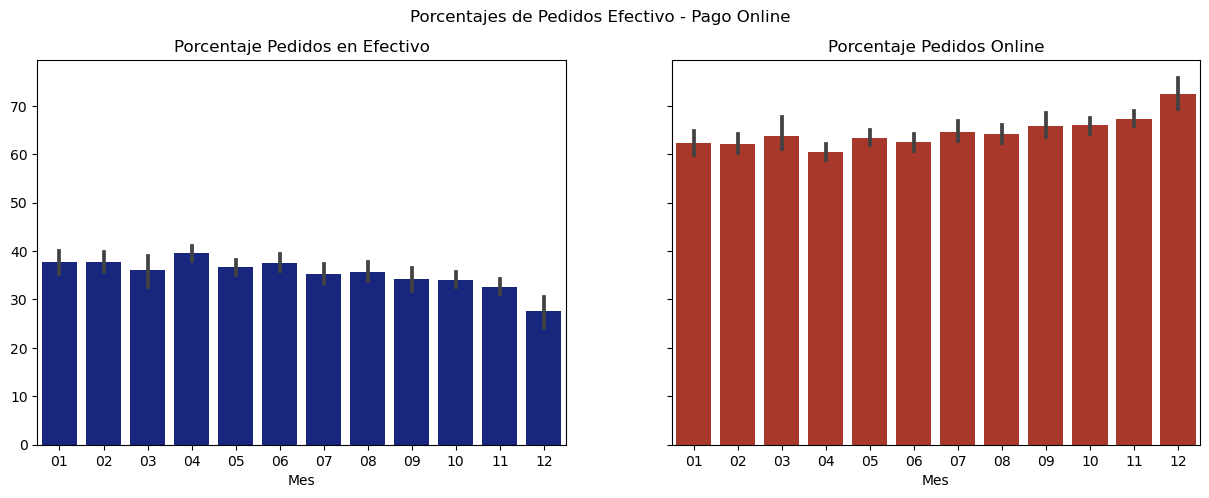

In [102]:
#Grafico de porcentajes de pedidos
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Porcentajes de Pedidos Efectivo - Pago Online')
#Efectivo
s1 = sns.barplot(x = 'Mes', y = 'Porcentaje Pedidos en Efectivo', data=df_final, color = '#07198F', estimator=np.mean, ax=axes[0])
s1.set(ylabel=None)
axes[0].set_title('Porcentaje Pedidos en Efectivo')
#Pago Online
s2 = sns.barplot(x = 'Mes', y ='Porcentaje Pedidos Online', data=df_final, color = '#BD2716', estimator=np.mean, ax=axes[1])
s2.set(ylabel=None)
axes[1].set_title('Porcentaje Pedidos Online')